## Plots in Julia - part I

In this session we will work with the `Plots` library. 

In [1]:
using CSV, DataFrames, Pkg, Plots

In [2]:
x = range(0, 2π, length=100)

0.0:0.06346651825433926:6.283185307179586

Let's make our first plot!

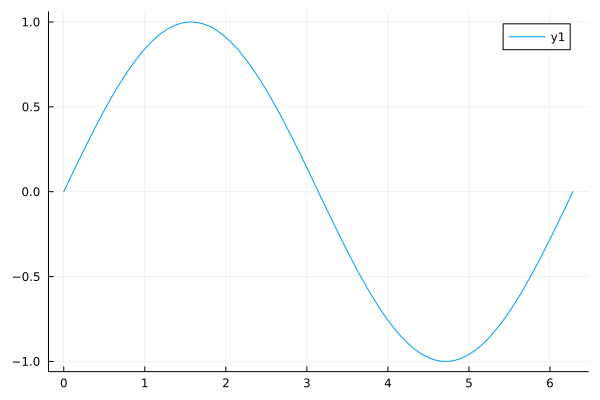

In [3]:
plot(sin, x)

Below we see how we can plot two lines.

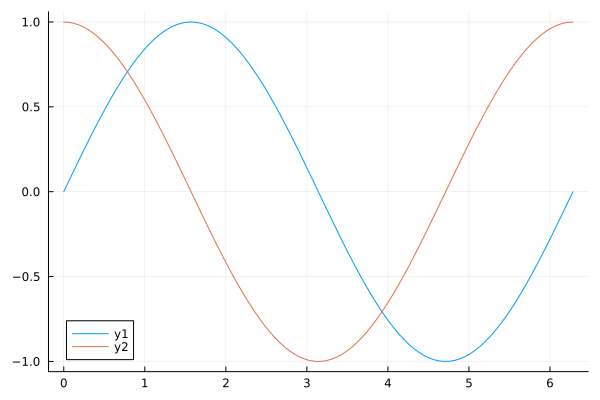

In [4]:
plot([sin, cos], x)

Or equivalently

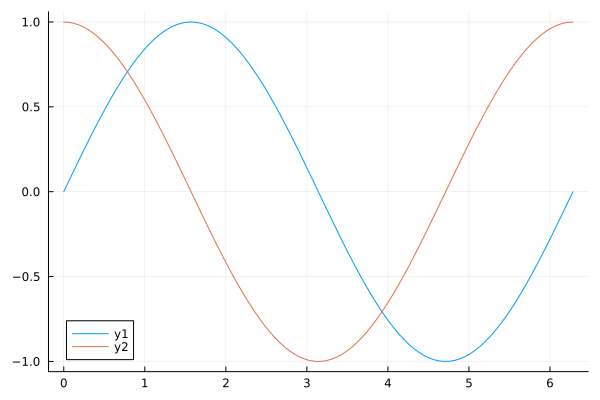

In [5]:
plot(x, [sin.(x), cos.(x)])

Need to make the plot bit more informative

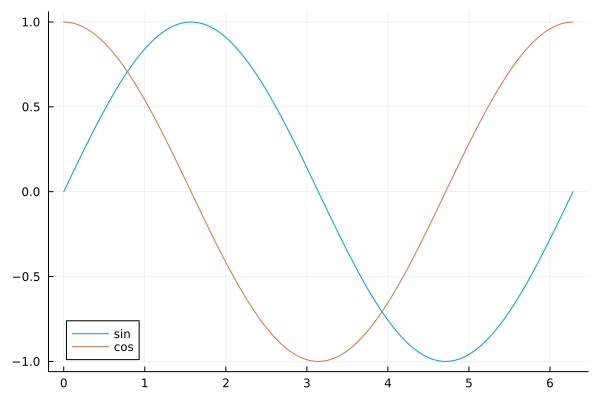

In [6]:
plot([sin, cos], x, labels=["sin" "cos"])

Pay attention to this small detail

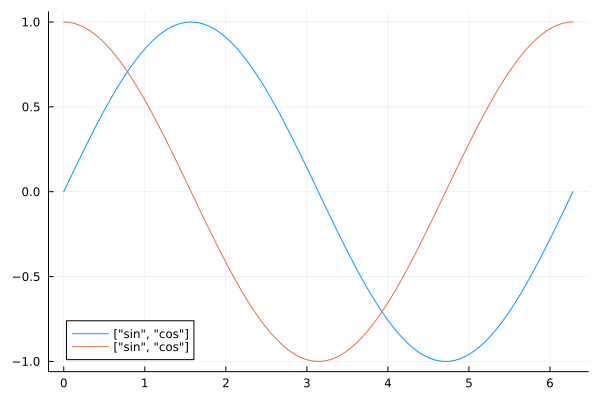

In [7]:
plot([sin, cos], x, labels=["sin", "cos"])

If I wanted to use different colours

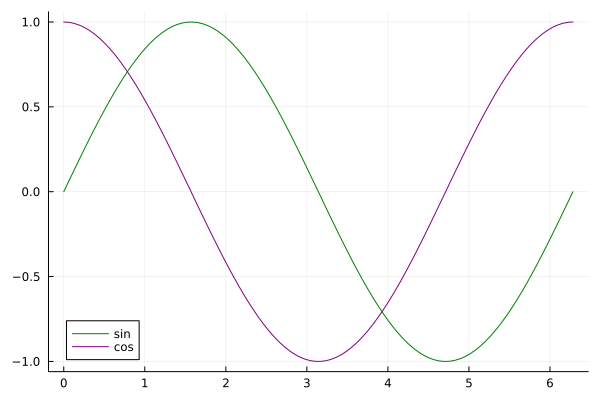

In [8]:
plot([sin, cos], x, labels=["sin" "cos"], linecolor=[:green :purple])

Next we are going to see how to make some of the most common plots. Will use the famous `Iris` dataset for that.

In [9]:
#Pkg.add("RDatasets")
using RDatasets

In [50]:
iris = dataset("datasets", "iris")

150×5 DataFrame
 Row │ SepalLength  SepalWidth  PetalLength  PetalWidth  Species   
     │ Float64      Float64     Float64      Float64     Cat…      
─────┼─────────────────────────────────────────────────────────────
   1 │         5.1         3.5          1.4         0.2  setosa
   2 │         4.9         3.0          1.4         0.2  setosa
   3 │         4.7         3.2          1.3         0.2  setosa
   4 │         4.6         3.1          1.5         0.2  setosa
   5 │         5.0         3.6          1.4         0.2  setosa
   6 │         5.4         3.9          1.7         0.4  setosa
   7 │         4.6         3.4          1.4         0.3  setosa
   8 │         5.0         3.4          1.5         0.2  setosa
  ⋮  │      ⋮           ⋮            ⋮           ⋮           ⋮
 144 │         6.8         3.2          5.9         2.3  virginica
 145 │         6.7         3.3          5.7         2.5  virginica
 146 │         6.7         3.0          5.2         2.3  virginica
 147 │         6.3         2.5          5.0         1.9  virginica
 148 │         6.5         3.0          5.2         2.0  virginica
 149 │         6.2         3.4          5.4         2.3  virginica
 150 │         5.9         3.0          5.1         1.8  virginica
                                                   135 rows omitted

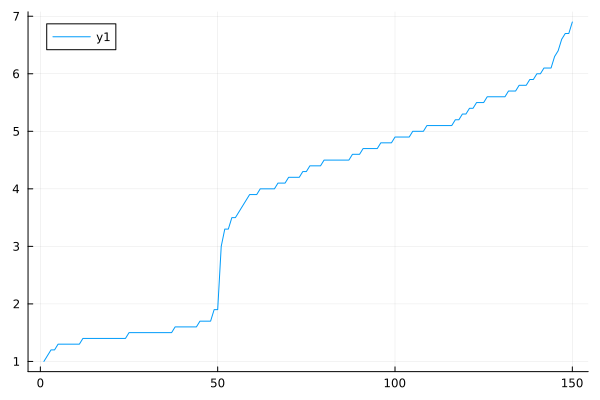

In [12]:
plot(sort(iris.PetalLength))

### Scatterplots

A common type of plot for investigating the relationship between two variable is the scatterplot.

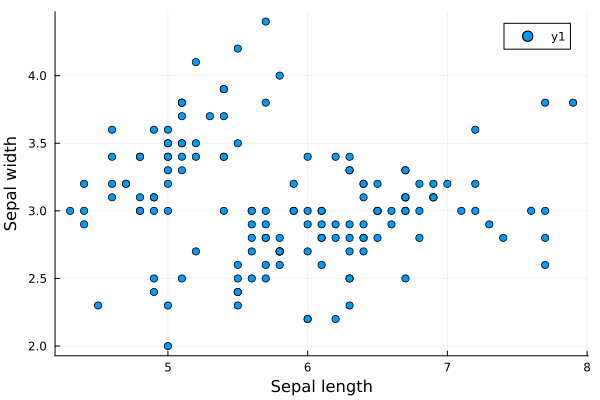

In [15]:
plot(iris.SepalLength, iris.SepalWidth, 
    xlabel="Sepal length", ylabel="Sepal width",seriestype=:scatter)

We have also the option of using dedicated functions. Here I add some additional information.

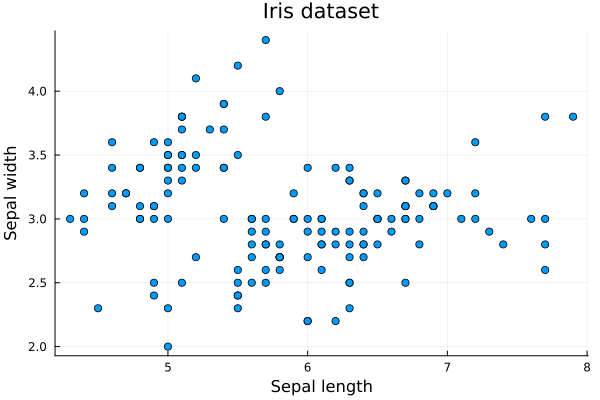

In [16]:
scatter(iris.SepalLength, iris.SepalWidth,
    xlabel="Sepal length", ylabel="Sepal width", 
    title="Iris dataset", labels=false)

When we have lot of data the scatter plot can be cluttered and not depict efficiently the intended info. In that case we could play with the transparency. This can be controlled through the `alpha`argument. Conveniently the same name is used in other languages e.g the Seaborn package in Python.

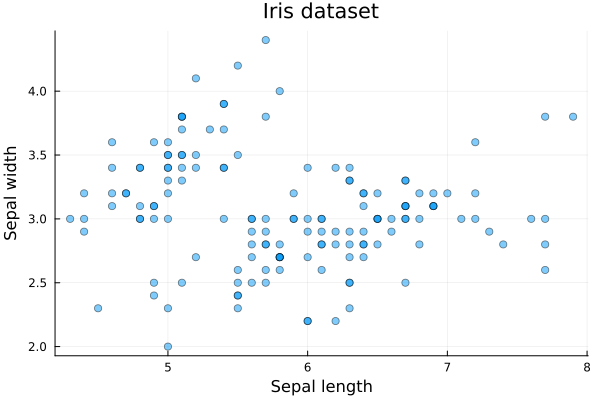

In [18]:
scatter(iris.SepalLength, iris.SepalWidth,
    xlabel="Sepal length", ylabel="Sepal width", 
    title="Iris dataset", labels=false, alpha=0.5)

Equivalently I could have done the following.

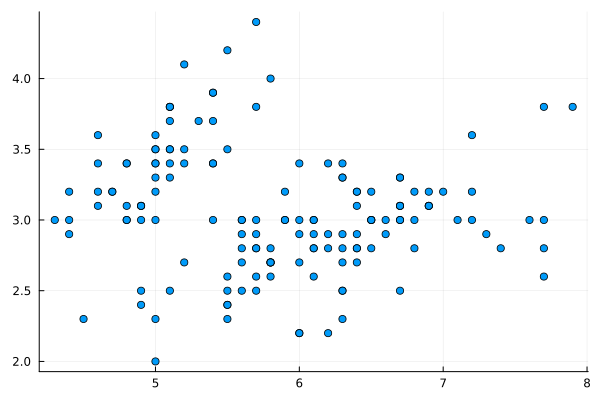

In [ ]:
scatter(iris.SepalLength, iris.SepalWidth, labels=false)

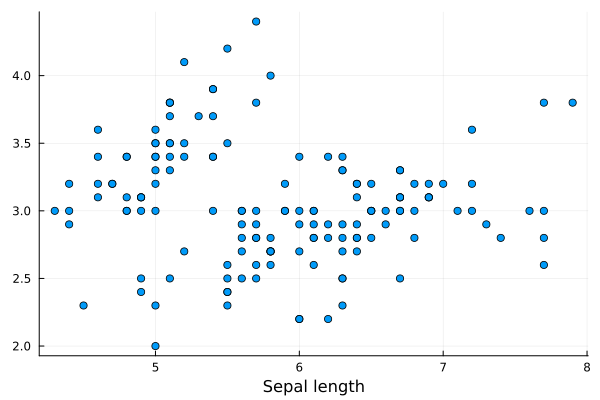

In [7]:
xlabel!("Sepal length")

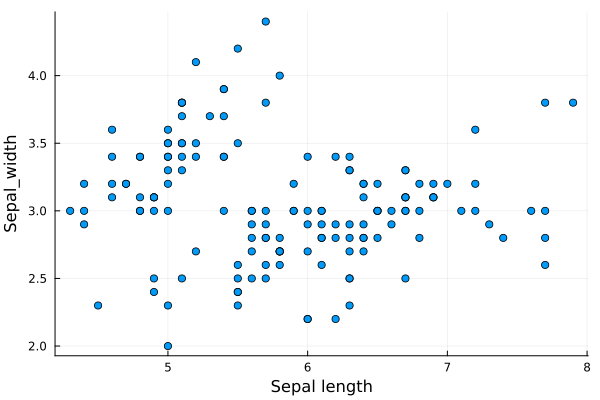

In [ ]:
ylabel!("SepalWidth")

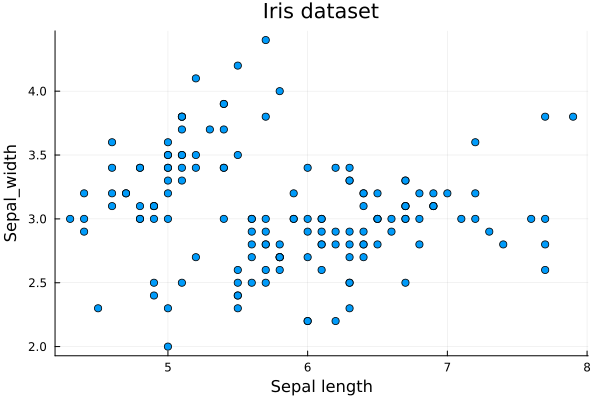

In [9]:
title!("Iris dataset")

Adding a regression line is quite common in scatter plots. Let's see how to do it.

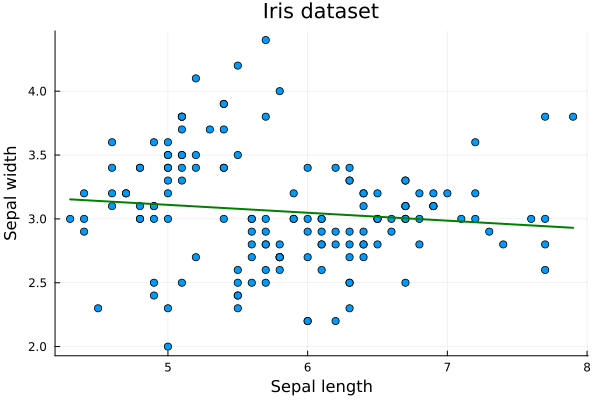

In [20]:
scatter(iris.SepalLength, iris.SepalWidth,smooth=true, linecolor=:green,linewidth=2,
    xlabel="Sepal length", ylabel="Sepal width", 
    title="Iris dataset", labels=false)

It's common to want to annotate such plots with e.g. the regression equation.

In [21]:
#Pkg.add("GLM")
using GLM

In [23]:
model =lm(@formula(SepalWidth ~ SepalLength), iris)

StatsModels.TableRegressionModel{LinearModel{GLM.LmResp{Vector{Float64}}, GLM.DensePredChol{Float64, LinearAlgebra.CholeskyPivoted{Float64, Matrix{Float64}, Vector{Int64}}}}, Matrix{Float64}}

SepalWidth ~ 1 + SepalLength

Coefficients:
──────────────────────────────────────────────────────────────────────────
                  Coef.  Std. Error      t  Pr(>|t|)  Lower 95%  Upper 95%
──────────────────────────────────────────────────────────────────────────
(Intercept)   3.41895      0.253562  13.48    <1e-26   2.91788   3.92002
SepalLength  -0.0618848    0.042967  -1.44    0.1519  -0.146793  0.0230232
──────────────────────────────────────────────────────────────────────────

In [24]:
#Pkg.add("LaTeXStrings")
using LaTeXStrings

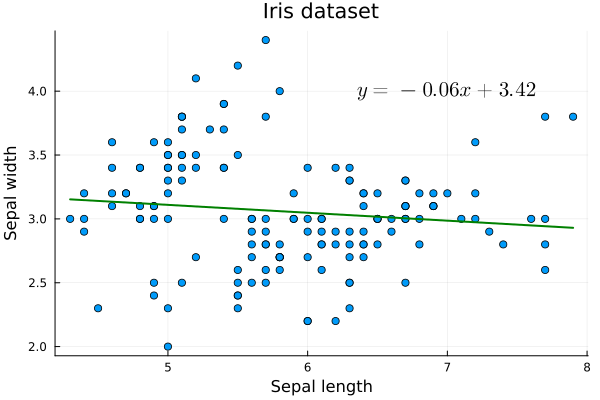

In [25]:
annotate!(7,4,
  latexstring(
    "y = $(round(coef(model)[2], digits = 2))x + $(round(coef(model)[1], digits = 2))"
  )
)


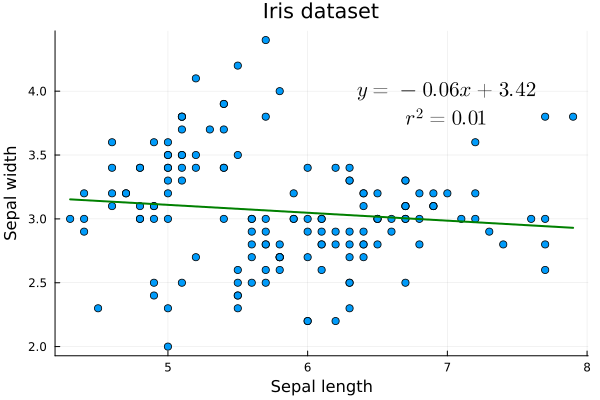

In [26]:
annotate!(
  7,
  3.8,
  latexstring("r^2 = $(round(r2(model), digits = 2))")
)

### Histograms

Let's see now how we can make a histogram.

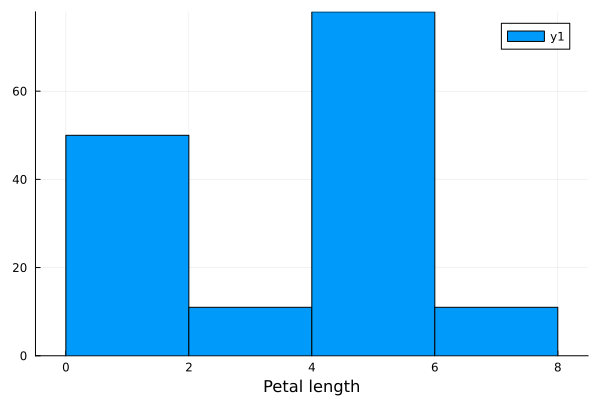

In [ ]:
histogram(iris.PetalLength, xlabel= "Petal length")

In histrograms the number of bins is one of the most important parameters one would need to adjust.

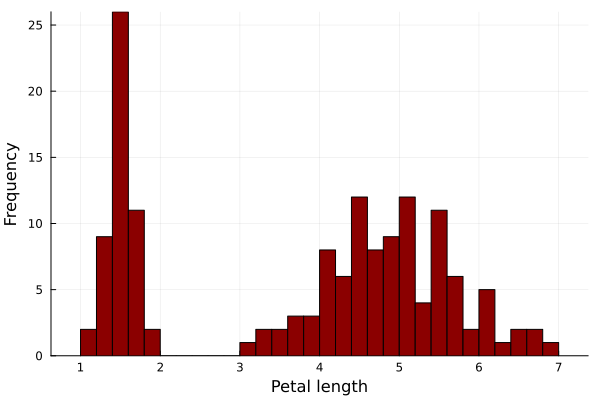

In [ ]:
histogram(iris.PetalLength, xlabel= "Petal length", ylabel="Frequency", labels=false,
     color=:darkred, bins=30)

Another commom procedure is to normalize.

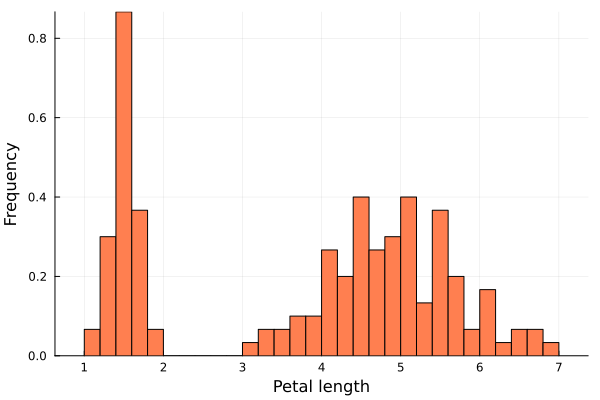

In [ ]:
histogram(iris.PetalLength, xlabel= "Petal length", ylabel="Frequency", labels=false,
     color=:coral, bins=30, normalize=true) 

We could also incorporate a density function.

In [28]:
#Pkg.add("StatsPlots")
using StatsPlots

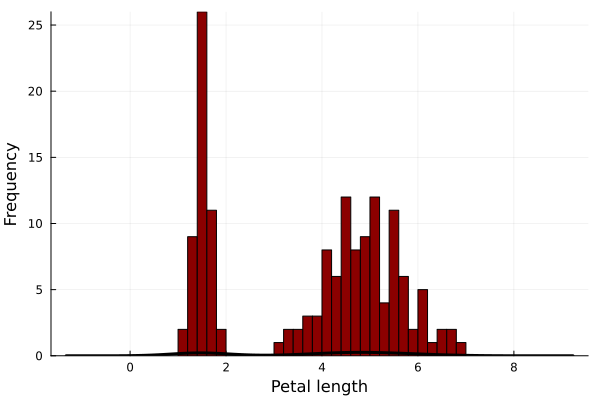

In [ ]:
density!(iris.PetalLength,color=:black,label=false,linewidth=3)

We could include information about the different Species in the form of the grouped histogram as follows.

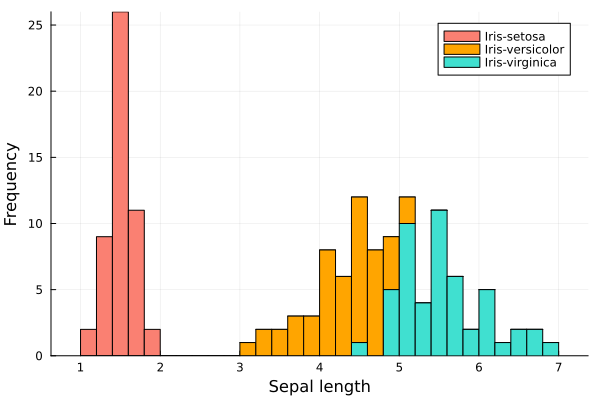

In [ ]:
groupedhist(iris.PetalLength, group=iris.species, 
    color=[:salmon :orange :turquoise ], bar_position=:stack, bins=30, 
    xlabel="Sepal length", ylabel="Frequency")

### Bar charts

Bar charts can be useful when we want to compare different categories.

In [11]:
#Pkg.add("DataFramesMeta")
using DataFramesMeta

In [ ]:
iris_mean = @chain iris begin 
    groupby(:Species)
    combine(:SepalLength => mean => :mean_SepalLength)
end

3×2 DataFrame
 Row │ species          mean_sepal_length 
     │ String15         Float64           
─────┼────────────────────────────────────
   1 │ Iris-setosa                  5.006
   2 │ Iris-versicolor              5.936
   3 │ Iris-virginica               6.588

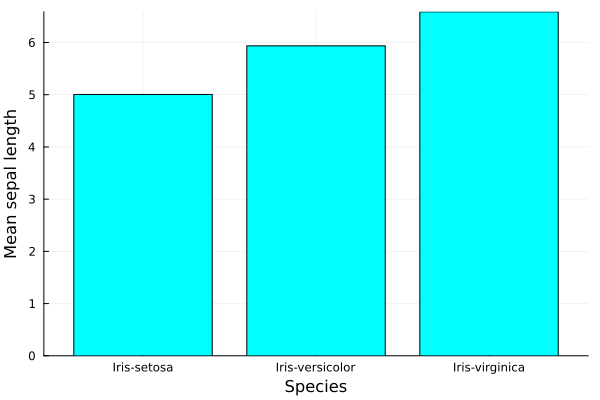

In [ ]:
bar(iris_mean.Species, iris_mean.mean_SepalLength,
    label=false,xlabel="Species", ylabel="Mean sepal length", color=:cyan)

### Box and violin plots

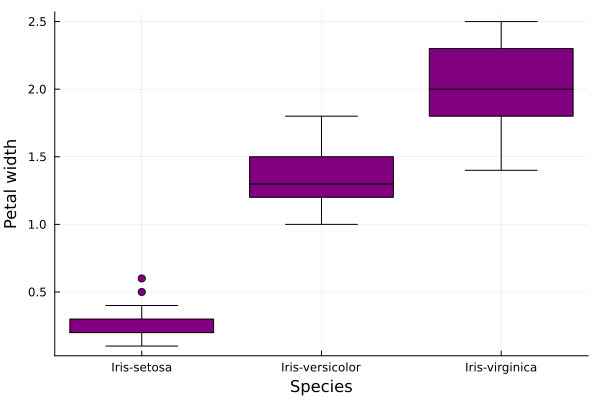

In [ ]:
boxplot(iris.Species, iris.PetalWidth, color=:purple, label=false, 
            xlabel="Species", ylabel="Petal width")

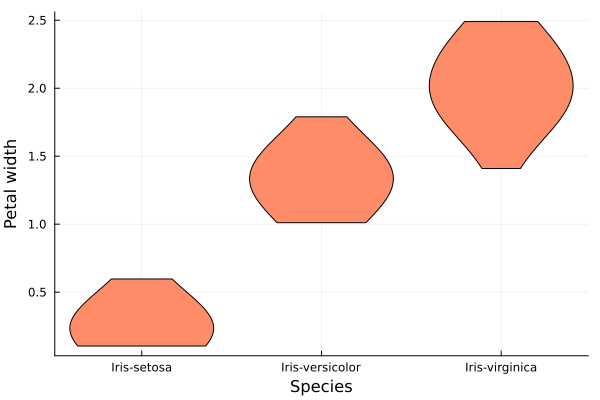

In [ ]:
violin(iris.Species, iris.PetalWidth, color=:salmon1, label=false, 
            xlabel="Species", ylabel="Petal width")

### Heatmaps

Heatmaps are another common type of plot when we want to visualize the structure of a matrix.

In [27]:
using Statistics

In [28]:
iris_num= names(iris, Float64)

4-element Vector{String}:
 "SepalLength"
 "SepalWidth"
 "PetalLength"
 "PetalWidth"

In [29]:
iris_reduced = select(iris, iris_num) 

150×4 DataFrame
 Row │ SepalLength  SepalWidth  PetalLength  PetalWidth 
     │ Float64      Float64     Float64      Float64    
─────┼──────────────────────────────────────────────────
   1 │         5.1         3.5          1.4         0.2
   2 │         4.9         3.0          1.4         0.2
   3 │         4.7         3.2          1.3         0.2
   4 │         4.6         3.1          1.5         0.2
   5 │         5.0         3.6          1.4         0.2
   6 │         5.4         3.9          1.7         0.4
   7 │         4.6         3.4          1.4         0.3
   8 │         5.0         3.4          1.5         0.2
  ⋮  │      ⋮           ⋮            ⋮           ⋮
 144 │         6.8         3.2          5.9         2.3
 145 │         6.7         3.3          5.7         2.5
 146 │         6.7         3.0          5.2         2.3
 147 │         6.3         2.5          5.0         1.9
 148 │         6.5         3.0          5.2         2.0
 149 │         6.2         3.4          5.4         2.3
 150 │         5.9         3.0          5.1         1.8
                                        135 rows omitted

In [30]:
cor_mat = cor(Matrix(iris_reduced))

4×4 Matrix{Float64}:
  1.0       -0.11757    0.871754   0.817941
 -0.11757    1.0       -0.42844   -0.366126
  0.871754  -0.42844    1.0        0.962865
  0.817941  -0.366126   0.962865   1.0

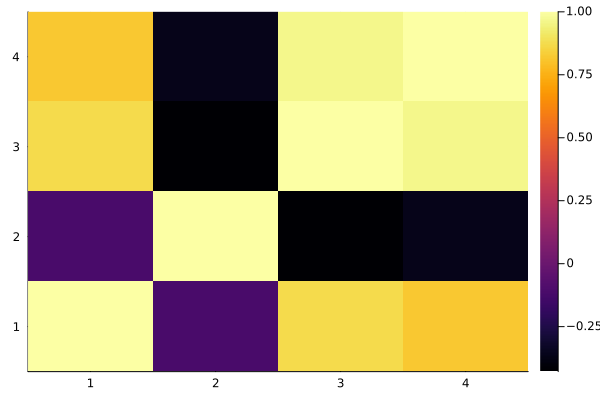

In [31]:
hm = heatmap(cor_mat)

Notice that by default the first matrix element is ploted on the bottom left. If we are not satisfied with that we could try the following.

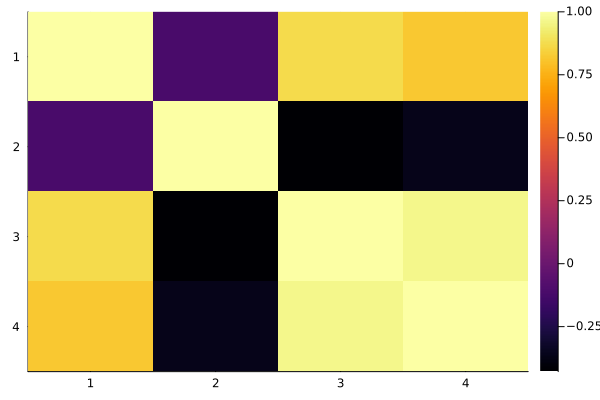

In [32]:
plot!(hm, yflip=true)

### Themes

Ploting libraries often come with ready to use themes. It's always good to have an idea of what it's available as it can reduce our workoload and allow us to produce publication quality plots with minimal effort.

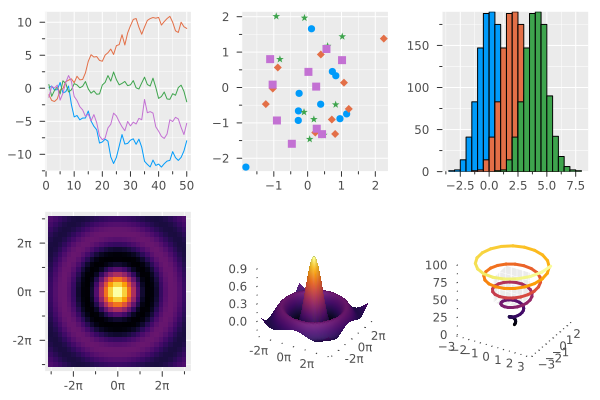

In [33]:
showtheme(:ggplot2)

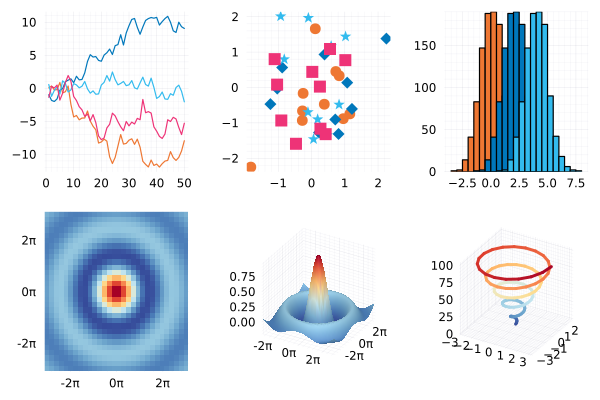

In [34]:
showtheme(:vibrant)

In [35]:
theme(:vibrant)

In [38]:
using StatsPlots

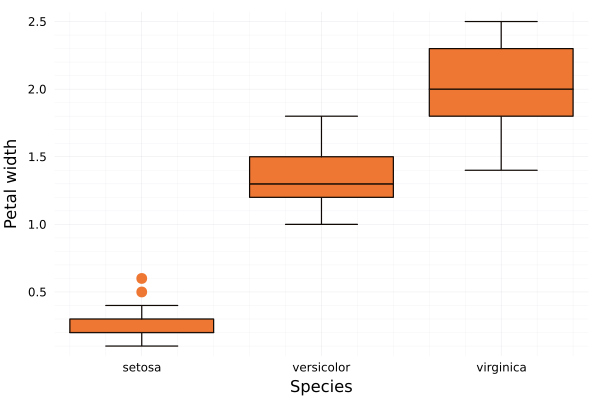

In [39]:
boxplot(iris.Species, iris.PetalWidth, label=false, 
            xlabel="Species", ylabel="Petal width")

In [40]:
theme(:ggplot2)

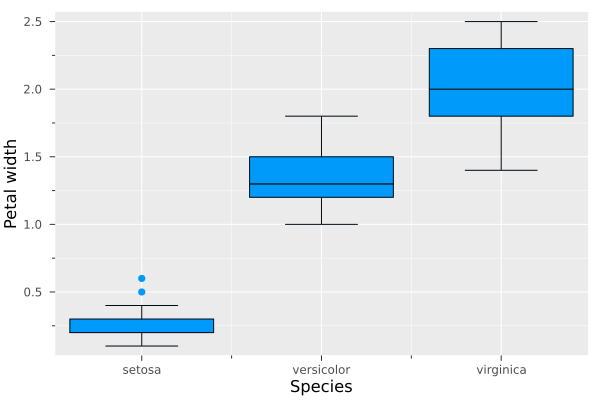

In [42]:
boxplot(iris.Species, iris.PetalWidth, label=false, 
            xlabel="Species", ylabel="Petal width")

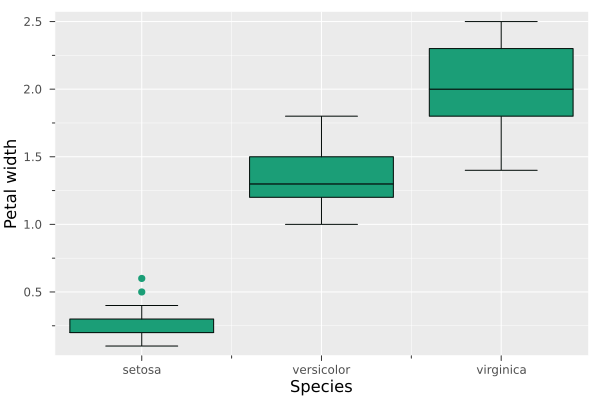

In [43]:
boxplot(iris.Species, iris.PetalWidth, palette=:Dark2_5, label=false, 
            xlabel="Species", ylabel="Petal width")

### Layouts

Often we might want to have multiple plots in the same figure. Let's see how we can accomplish this.

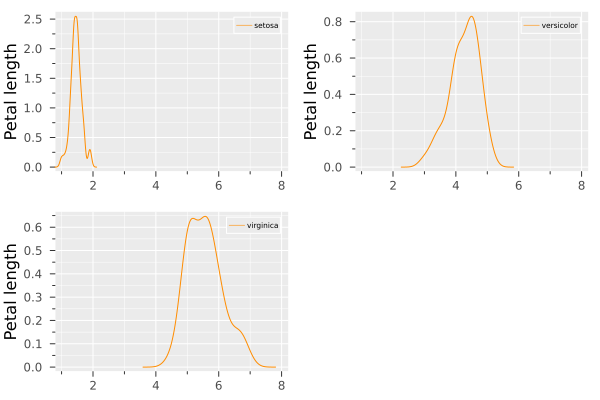

In [44]:
density(iris.PetalLength, group=iris.Species, 
    ylabel="Petal length",xlims=(1,8),
    color=:darkorange,legend=:topright,
    legendfontsize=5,
     layout=3)

We can be more specific about the layout

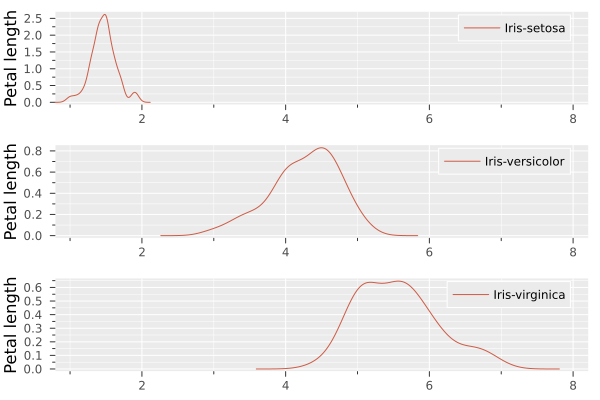

In [ ]:
density(iris.PetalLength, group=iris.species, 
    ylabel="Petal length",xlims=(1,8),
    legend=:topright,color=:coral3,
     layout=(3,1))

Now let's see how we can combine different kind of plots in the same figure.

In [45]:
p1 = boxplot(iris.Species, iris.PetalWidth, color=:lightseagreen, label=false, 
            xlabel="Species", ylabel="Petal width");

In [46]:
p2 = histogram(iris.PetalLength, xlabel= "Petal length", ylabel="Frequency", labels=false,
color=:lavender, bins=30);

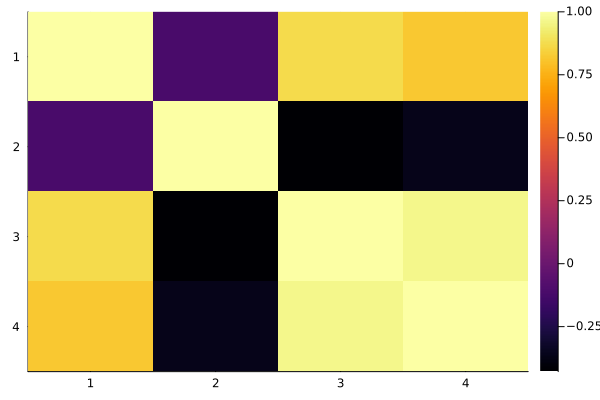

In [47]:
hm

In [48]:
layout = @layout [a b; c]

2×1 Matrix{Any}:
 Any[(label = :a, blank = false) (label = :b, blank = false)]
 (label = :c, blank = false)

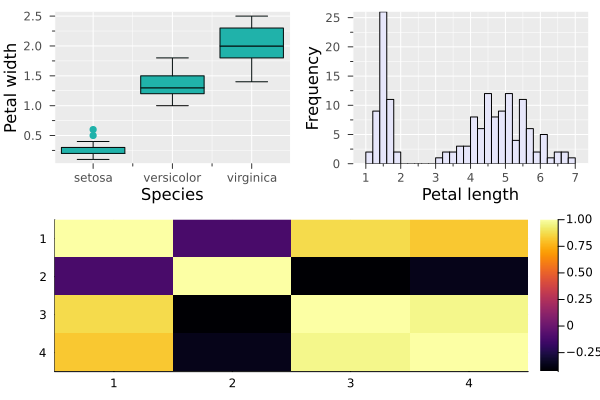

In [49]:
plot(p1,p2,hm,layout=layout)

### Plot recipes

The `StatsPlots`library allows for efficient recipes for ploting data stored in DataFrames using the `@df`notation.

In [4]:
using StatsPlots

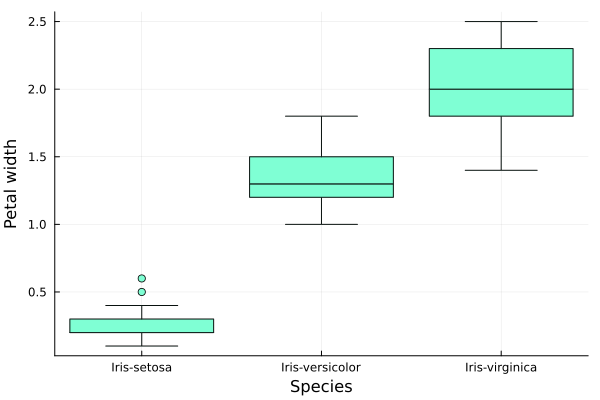

In [ ]:
@df iris boxplot(:Species, :PetalWidth, color=:aquamarine, label=false, 
            xlabel="Species", ylabel="Petal width")

We can create more elaborate pipelines using `@df` inside `@chain`. Let's see an example.

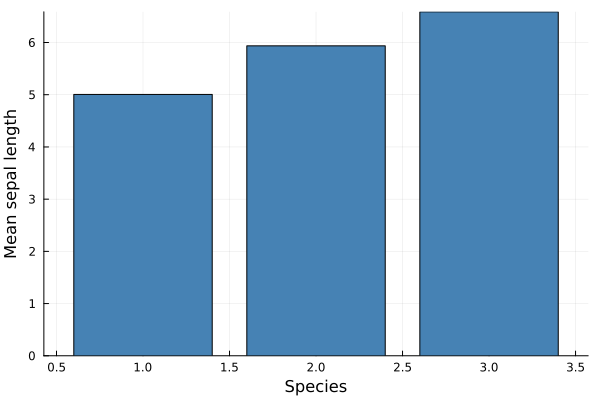

In [ ]:
@chain iris begin 
    groupby(:Species)
    combine(:SepalLength => mean => :mean_sepal_length,
            :SepalWidth => mean => :mean_sepal_width,
            :PetalLength => mean => :mean_PetalLength,
            :PetalWidth => mean => :mean_petal_width)
    @df bar(:mean_sepal_length,
    label=false,xlabel="Species", ylabel="Mean sepal length", color=:steelblue)
end

In case you are fond of 3-dimensional plots you can try the following.

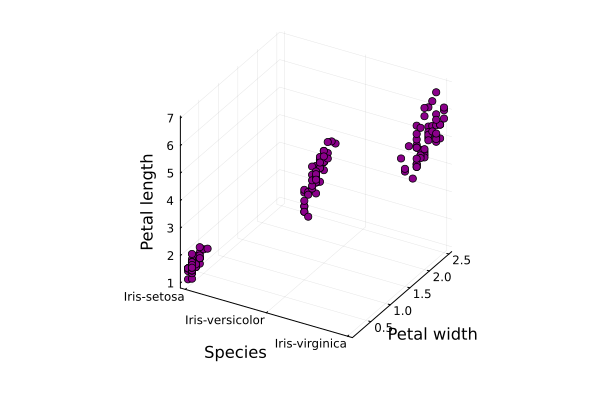

In [ ]:
@df iris scatter(:Species, :PetalWidth, :PetalLength, color=:magenta4,markersize=4, label=false, 
            xlabel="Species", ylabel="Petal width", zlabel="Petal length")

We can use `@df`recipes to make plot combinations.

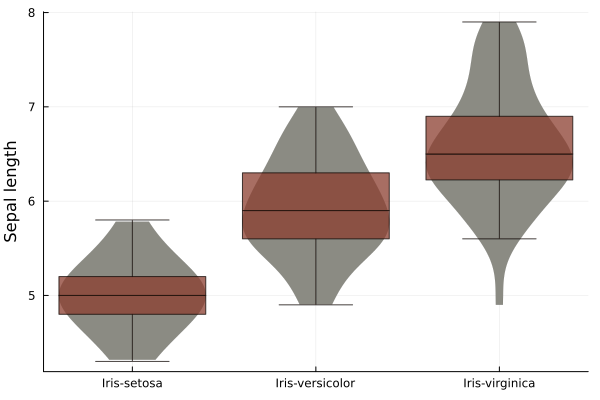

In [ ]:
@df iris violin(
    :Species, :SepalLength,
    label=false, linewidth=0,
    fillcolor=:ivory4)
# Add box plot
@df iris boxplot!(
    :Species, :SepalLength,
    label=false, alpha=0.75,
    fillcolor=:coral4,
    outliers=false,
)
ylabel!("Sepal length")

As you might have guessed we can use `@df`recipes for creating multiple plots in the same figure.

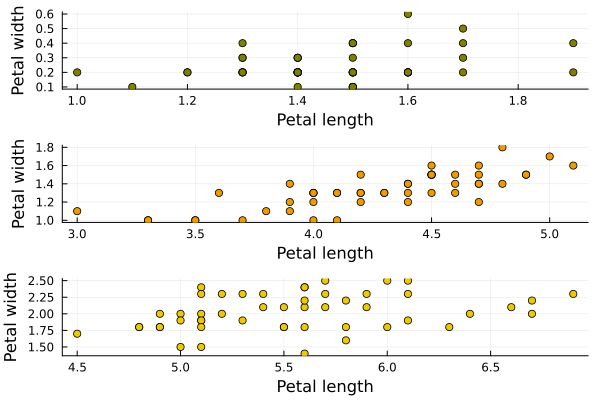

In [ ]:
@df iris scatter(:PetalLength, :PetalWidth,color=[:olive :orange2 :gold2 :turquoise4], markersize=4, label=false, 
                    group=:Species, xlabel="Petal length", ylabel="Petal width",layout=(3,1))

Now let's see how we can make correlation matrix plots.

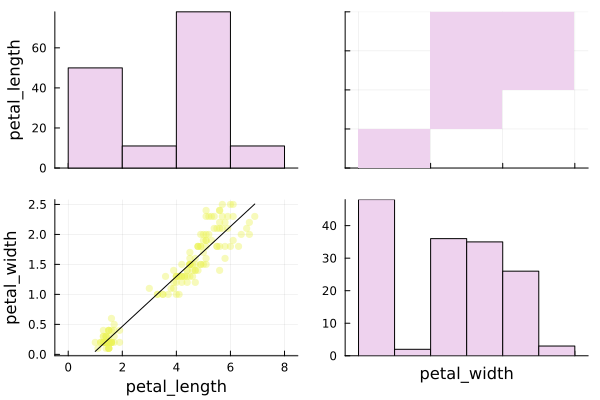

In [ ]:
@df iris corrplot([:PetalLength :PetalWidth], markercolor=:thermal, fillcolor=:thistle2)

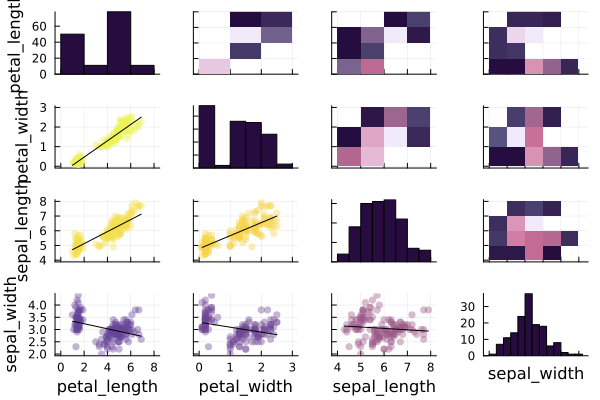

In [ ]:
@df iris corrplot([:PetalLength :PetalWidth :SepalLength :sepal_width], 
                    markercolor=:thermal, fillcolor=:acton)

## Exercises

### Exercise 1

* Create a line plot depicting the `tan` function of a vector x of size 1000 and ranging from 0 to 2π radians. 
* Name the two axis appropriately. The plot should not have a legend.

### Exercise 2

* Load the `sleepstudy`dataset from `RDatasets`. The dataset is from the `lme4`package.
* Fit a linear model using `Reaction`as the response variable and `Day`as the predictor. Add a scatterplot between Days (xaxis) and Reaction (yaxis) and add a regression line with the corresponding annotation. Use the color `coral3` for the dots and `cyan4`for the line. The line should have a width of 3. Name appropriatetely the x and the y axis. Use a transparency of 0.5 for the dots.
* Bonus question. Make the same plot as above adding 95% confidence intervals.


### Exercise 3

* Load the `tilapia_pheno.txt`dataset.
* Created a grouped histogram of the two locations for final weight.
* Create a boxplot for final length for all different lines of the two locations. 
* Estimate a correlation matrix for all numeric variables. Plot a heat map.
* Change the layout to `ggplot2`. Create a figure containing all the previous plots.